In [1]:
import pygad
import numpy as np
import random
import pandas as pd
import time
import math
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
import random as rd
import matplotlib.pyplot as plt

# Introduction to Battleship puzzle

The goal of Battleship puzzle is to find the location of the battleships hidden in the grid (we will call it board). 
In this project a battleships are represented by number 0 and empty spaces are represented by number 1. Single battleship can consist of one up to five fields (squares) on the grid. Number of battleships and their length can vary depending on the size of game board, but for the purpouse of this project we will determine them as following:

1. Small game boards (6x6) - three single-square, two double-square, one triple-square (10 battleships overall)
2. Medium game boards (10x10) - four single-square, three double-square, two triple-square battleships, one quadruple-square (20 battleships overall)
3. Big game boards (15x15) - five single-square, four double-square, three triple-square battleships, two quadruple-square, one quintuple-square (35 battleships overall)

#### Two battleships cannot touch each other (even diagonally)

In some puzzles the there are numbers outside the grid which show the number of cells occupied by battleships on that row/column. We will take that into consideration in second genetic algorithm fitness.




### Inputs

In [2]:
#creating inputs: three lists of lists for each board size
#0 - ship cell, 1- empty space
small_board1 =[[1,1,1,1,1,1],
               [1,0,1,0,0,1],
               [1,0,1,1,1,1],
               [1,1,1,0,1,0],
               [0,1,1,1,1,1],
               [1,1,0,0,0,1]]

small_board2 =[[0,1,1,1,1,1],
               [0,1,1,0,0,1],
               [0,1,1,1,1,1],
               [1,1,0,1,1,0],
               [1,1,0,1,1,1],
               [0,1,1,1,0,1]]

small_board3 =[[0,1,1,0,0,0],
               [1,1,1,1,1,1],
               [0,1,1,1,1,1],
               [0,1,1,0,1,1],
               [1,1,1,1,1,0],
               [1,1,0,1,1,0]]


medium_board1 =[[1,1,1,1,1,1,0,0,1,1],
                [0,0,0,1,0,1,1,1,1,1],
                [1,1,1,1,1,1,1,1,0,1],
                [1,1,1,1,1,1,1,1,0,1],
                [1,1,0,1,1,0,1,1,0,1],
                [1,1,1,1,1,1,1,1,0,1],
                [1,1,1,1,1,1,1,1,1,1],
                [0,0,1,1,0,1,1,0,0,1],
                [1,1,1,1,0,1,1,1,1,1],
                [1,1,1,1,0,1,1,1,0,1]]

medium_board2 =[[1,1,1,1,1,1,1,0,0,0],
                [1,0,1,1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1,1,1,1],
                [1,1,1,0,0,0,0,1,0,1],
                [1,0,1,1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1,1,1,1],
                [1,1,0,0,1,1,0,1,1,1],
                [1,1,1,1,1,1,0,1,1,1],
                [1,0,0,1,1,1,0,1,1,0],
                [1,1,1,1,0,1,1,1,1,0]]

medium_board3 =[[1,0,1,1,1,1,1,1,1,1],
                [1,1,1,0,0,0,0,1,1,1],
                [1,1,1,1,1,1,1,1,0,1],
                [1,1,1,1,1,1,1,1,1,1],
                [1,0,0,0,1,1,1,1,0,1],
                [1,1,1,1,1,0,1,1,0,1],
                [1,0,1,1,1,1,1,1,1,1],
                [1,0,1,1,1,0,1,1,1,1],
                [1,1,1,1,1,0,1,1,0,0],
                [1,1,0,1,1,0,1,1,1,1]]


big_board1 =[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
             [1,1,1,1,1,1,1,0,1,1,1,0,0,1,1],
             [1,1,1,0,1,1,1,0,1,0,1,1,1,1,1],
             [1,1,1,0,1,1,1,0,1,1,1,1,1,1,1],
             [1,1,1,0,1,1,1,1,1,1,1,0,0,1,1],
             [1,1,1,0,1,1,1,1,1,1,1,1,1,1,1],
             [1,1,1,0,1,1,1,1,0,0,0,0,1,1,1],
             [1,1,1,1,1,1,1,1,1,1,1,1,1,0,1],
             [1,0,1,1,1,1,1,1,1,1,1,0,1,1,1],
             [1,1,1,1,0,0,0,0,1,1,1,0,1,1,1],
             [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
             [1,0,0,1,1,1,1,1,1,1,1,1,1,1,1],
             [1,1,1,1,1,0,1,1,1,1,0,0,0,1,1],
             [1,0,1,1,1,0,1,1,1,1,1,1,1,1,1],
             [1,1,1,1,1,0,1,1,0,1,1,1,1,1,1]]

big_board2 =[[1,1,1,1,1,0,1,1,1,1,1,1,1,0,1],
             [1,1,1,1,1,1,1,0,1,1,1,1,1,1,1],
             [1,1,1,1,1,1,1,0,1,1,1,0,1,1,1],
             [1,1,0,0,0,1,1,1,1,1,1,0,1,0,0],
             [1,1,1,1,1,1,1,1,1,1,1,0,1,1,1],
             [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
             [1,1,1,1,1,1,1,1,0,0,0,0,1,1,1],
             [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
             [1,1,1,1,1,1,0,1,1,1,1,1,1,0,1],
             [0,1,1,0,1,1,1,1,1,1,1,1,1,0,1],
             [1,1,1,0,1,1,0,0,0,1,1,1,1,1,1],
             [1,1,1,0,1,1,1,1,1,1,1,1,1,1,1],
             [1,1,1,0,1,1,1,1,1,1,1,1,0,1,1],
             [1,1,1,1,1,1,0,0,0,0,0,1,1,1,1],
             [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1]]

big_board3 =[[0,1,1,1,0,0,0,0,1,1,1,0,0,1,1],
             [1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
             [0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
             [1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
             [0,1,1,1,1,1,1,0,1,1,1,1,1,1,1],
             [0,1,1,1,1,1,1,1,1,1,1,1,1,0,1],
             [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
             [0,1,1,1,1,1,1,1,1,1,0,0,0,0,1],
             [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
             [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
             [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
             [1,1,1,1,1,1,1,1,1,1,1,1,1,0,1],
             [0,1,1,1,1,1,1,0,1,1,1,1,1,0,1],
             [0,1,1,1,1,1,1,0,1,1,1,1,1,0,1],
             [1,1,1,0,0,1,1,0,1,1,0,1,1,1,1]]

#creating lists of boards of different size for evaluation purposes
small = [small_board1, small_board2, small_board3]   
medium = [medium_board1, medium_board2, medium_board3]
big = [big_board1, big_board2, big_board3]

# Algorithm 1

In this approach we want to find solution using the least number of shots possible which equals to number of battleships on the input board. We want the chromosome to represent the coordinates of shots. To achieve this we will be pairing neighbouring genes, so te chromosome ends up being a list of two element tuples. Fitness function punishes for shooting the same coordinate twice or more, and rewards if cell containing ship is shoot but only if it wasn't hit before. The coordinate of succesfull shots are stored in list 'hit' which length is compared to the number of ships. Algorithm found desired solution if those two numbers are equal.

In [3]:
def fitness_func1(solution, solution_idx):
    
    fitness = 0
    hit = [] #creating list which hold ship cells that were hit
    
    #creating list of indices on the board that we will be shooting to, by zipping genes in pairs
    solution = list(map(int,solution)) 
    solution_index = list(zip(solution[::2],solution[1::2])) 

    
                                                         
    if len(set(solution_index)) != len(solution_index): #punishment for shooting in the same coordinate more than once
        fitness -=500
    

    for idx, shoot in enumerate(solution_index):
            
        if board[shoot[0]][shoot[1]] == 0: #ship cell has been hit
                if shoot not in hit: #checking if this ship hasn't been hit before 
                    hit.append(shoot) #if not we are appending coorrdinate of the ship cell to list 'hit'
                    fitness +=200 #adding points  
                    

        if board[shoot[0]][shoot[1]] == 1: #punishment for if we miss
            fitness -= 200
            
        #checking if all ships have been hit
        if len(hit) == ships:
            return 10000 #succes!
        
    
    return fitness

### Parameters and solution for each board size

#### Small board 6x6

Parameters of the best solution : [(3, 3), (4, 0), (5, 2), (3, 5), (1, 4), (5, 3), (2, 1), (1, 3), (5, 4), (1, 1)]
Fitness of best solution = 10000
Number of generations =  11


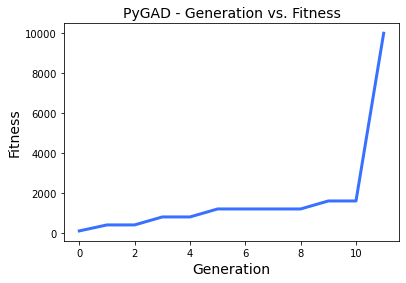

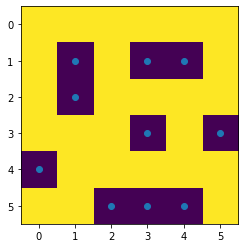

In [4]:
board = small_board1 #choosing input board

########################
#genes are x or y coordinates of the board so they can take values from 0 up to length of board-1
gene_space = [i for i in range(len(board))]
ships = Counter(chain(*board))[0] #number of ship-cells on the input board 


sol_per_pop = 100
num_genes =  ships*2 #number of genes needs to be 2xship-cells because we will be pairing them into coordinates
num_parents_mating = int(sol_per_pop * 0.3) #30% of the population
num_generations = 70
keep_parents = 2
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 5 #we want only one gene to mutate
stop = ['reach_10000'] #stop condition

fitness_function = fitness_func1

ga_instance = pygad.GA(gene_space=gene_space, num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, num_genes=num_genes, 
                       parent_selection_type=parent_selection_type, keep_parents=keep_parents, 
                       crossover_type=crossover_type, mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,stop_criteria = stop)

ga_instance.run()


solution, solution_fitness, solution_idx = ga_instance.best_solution()

#formating solution to show coordinates
solution = list(map(int,solution))
solution_index = list(zip(solution[::2],solution[1::2]))

print("Parameters of the best solution : {solution}".format(solution=solution_index))
print("Fitness of best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Number of generations = ", ga_instance.generations_completed)

ga_instance.plot_fitness()

#plotting solved board
#purple - ship
#blue dot - shot
coords = [list(t) for t in zip(*solution_index)]
plt.imshow(board)
plt.scatter(coords[1], coords[0])

#### Medium board 10x10

Parameters of the best solution : [(9, 4), (9, 8), (7, 7), (7, 4), (4, 2), (1, 2), (4, 8), (1, 4), (2, 8), (8, 4), (7, 1), (7, 0), (3, 8), (0, 7), (0, 6), (1, 1), (7, 8), (1, 0), (4, 5), (5, 8)]
Fitness of best solution = 10000
Number of generations =  86


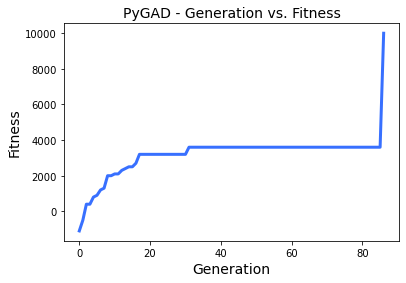

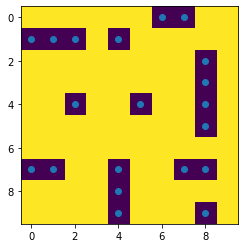

In [5]:
board = medium_board1

########################
gene_space = [i for i in range(len(board))]
ships = Counter(chain(*board))[0]


sol_per_pop = 200 #increased for efficiency
num_genes =  ships*2
num_parents_mating = int(sol_per_pop * 0.3) 
num_generations = 100 #increased for efficiency
keep_parents = 2
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 3 #we want only one gene to mutate
stop = ['reach_10000']

fitness_function = fitness_func1

ga_instance = pygad.GA(gene_space=gene_space, num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, num_genes=num_genes, 
                       parent_selection_type=parent_selection_type, keep_parents=keep_parents, 
                       crossover_type=crossover_type, mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,stop_criteria = stop)

ga_instance.run()


solution, solution_fitness, solution_idx = ga_instance.best_solution()


solution = list(map(int,solution))
solution_index = list(zip(solution[::2],solution[1::2]))

print("Parameters of the best solution : {solution}".format(solution=solution_index))
print("Fitness of best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Number of generations = ", ga_instance.generations_completed)

ga_instance.plot_fitness()


coords = [list(t) for t in zip(*solution_index)]
plt.imshow(board)
plt.scatter(coords[1], coords[0])

#### Big board 15x15

Parameters of the best solution : [(2, 3), (14, 5), (13, 1), (9, 6), (7, 13), (6, 11), (12, 10), (6, 9), (6, 8), (3, 7), (1, 12), (12, 11), (5, 3), (12, 12), (4, 11), (4, 3), (9, 11), (1, 11), (13, 5), (9, 5), (9, 7), (4, 12), (11, 2), (3, 3), (12, 5), (6, 10), (2, 9), (2, 7), (9, 4), (8, 1), (14, 8), (11, 1), (8, 11), (1, 7), (6, 3)]
Fitness of best solution = 10000
Number of generations =  170


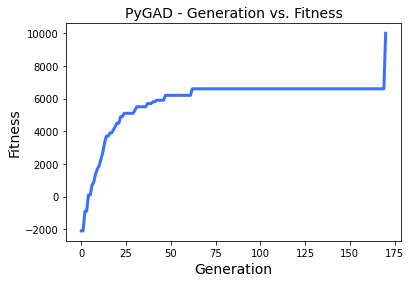

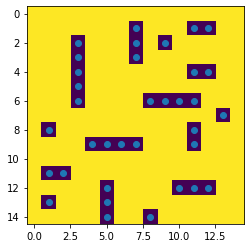

In [6]:
board = big_board1 

########################
gene_space = [i for i in range(len(board))]
ships = Counter(chain(*board))[0] 


sol_per_pop = 350 #increased for efficiency
num_genes =  ships*2
num_parents_mating = int(sol_per_pop * 0.3)
num_generations = 200 #increased for efficiency
keep_parents = 2
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 2 #we want only one gene to mutate
stop = ['reach_10000']

fitness_function = fitness_func1

ga_instance = pygad.GA(gene_space=gene_space, num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, num_genes=num_genes, 
                       parent_selection_type=parent_selection_type, keep_parents=keep_parents, 
                       crossover_type=crossover_type, mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,stop_criteria = stop)

ga_instance.run()


solution, solution_fitness, solution_idx = ga_instance.best_solution()


solution = list(map(int,solution))
solution_index = list(zip(solution[::2],solution[1::2]))

print("Parameters of the best solution : {solution}".format(solution=solution_index))
print("Fitness of best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Number of generations = ", ga_instance.generations_completed)

ga_instance.plot_fitness()


coords = [list(t) for t in zip(*solution_index)]
plt.imshow(board)
plt.scatter(coords[1], coords[0])

## Testing

#### Small board 6x6

In [7]:
Sscore = 0
Stime_score = []

for i in range(100):
    start_time = time.time()
    
    random_board = rd.randint(0,2)
    board = small[random_board]

    ########################
    gene_space = [i for i in range(6)]
    ships = 10

    sol_per_pop = 100
    num_genes =  ships*2 
    num_parents_mating = int(sol_per_pop * 0.3)
    num_generations = 70
    keep_parents = 2
    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"
    mutation_percent_genes = 5
    stop = ['reach_10000']
    
    fitness_function = fitness_func1 
    
    ga_instance = pygad.GA(gene_space=gene_space, num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, num_genes=num_genes, 
                       parent_selection_type=parent_selection_type, keep_parents=keep_parents, 
                       crossover_type=crossover_type, mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,stop_criteria = stop)

    
    ga_instance.run()
    end_time = time.time()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if solution_fitness == 10000:
        Sscore +=1
        Stime_score.append(end_time-start_time)


print("Efficiency: {:.2f}%".format(Sscore))
print("Average time: {:.3f} sekund".format(np.mean(Stime_score)))

Efficiency: 100.00%
Average time: 0.110 sekund


#### Medium board 10x10

In [8]:
Mscore1 = 0
Mtime_score1 = []

for i in range(100):
    start_time = time.time()
    
    random_board = rd.randint(0,2)
    board = medium[random_board]

    ########################
    gene_space = [i for i in range(10)]
    ships = 20

    sol_per_pop = 200
    num_genes =  ships*2
    num_parents_mating = int(sol_per_pop * 0.3)
    num_generations = 100
    keep_parents = 2
    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"
    mutation_percent_genes = 3
    stop = ['reach_10000']
    

    fitness_function = fitness_func1 
    
    ga_instance = pygad.GA(gene_space=gene_space, num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, num_genes=num_genes, 
                       parent_selection_type=parent_selection_type, keep_parents=keep_parents, 
                       crossover_type=crossover_type, mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,stop_criteria = stop)

    
    ga_instance.run()
    end_time = time.time()
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    if solution_fitness == 10000:
        Mscore1 +=1
        Mtime_score1.append(end_time-start_time)


print("Efficiency: {:.2f}%".format(Mscore1))
print("Average time: {:.3f} sekund".format(np.mean(Mtime_score1)))

Efficiency: 98.00%
Average time: 0.773 sekund


#### Big board 15x15

In [9]:
Bscore1 = 0
Btime_score1 = []

for i in range(100):
    start_time = time.time()
    
    random_board = rd.randint(0,2)
    board = big[random_board]

    ########################
    gene_space = [i for i in range(15)]
    ships = 35
    
    sol_per_pop = 350
    num_genes =  ships*2
    num_parents_mating = int(sol_per_pop * 0.3)
    num_generations = 200
    keep_parents = 2
    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"
    mutation_percent_genes = 2
    stop = ['reach_10000']
    
    fitness_function = fitness_func1 
    
    ga_instance = pygad.GA(gene_space=gene_space, num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, num_genes=num_genes, 
                       parent_selection_type=parent_selection_type, keep_parents=keep_parents, 
                       crossover_type=crossover_type, mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,stop_criteria = stop)

    
    ga_instance.run()
    end_time = time.time()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    if solution_fitness == 10000:
        Bscore1 +=1
        Btime_score1.append(end_time-start_time)


print("Efficiency: {:.2f}%".format(Bscore1))
print("Average time: {:.3f} sekund".format(np.mean(Btime_score1)))

Efficiency: 94.00%
Average time: 4.106 sekund


## Results:


|Size   | Efficiency  | Time     |
|------:|:------------|:---------|
| 6x6   | 100.00%     | 0.110s   |
| 10x10 | 98.00%      | 0.773s   |
| 15x15 | 94.00%      | 4.106s   |

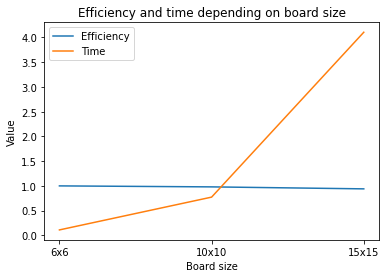

In [14]:
size = ['6x6', '10x10', '15x15']
score1 = [1, 0.98, 0.94] #efficiency presented as fraction
time1 = [0.110, 0.773, 4.106] #time

plt.plot(size, score1, label='Efficiency')
plt.plot(size, time1, label='Time')
plt.xlabel('Board size')
plt.ylabel('Value')
plt.title('Efficiency and time depending on board size')
plt.legend()
plt.show()

This genetic algorithm works great. Solution is found almost every time even for the biggest input. As expected, time of solving increases with board size, however average of 4s for 15x15 board is satisfying outcome. 

# Algorithm 2

Just as before, we want to find solution in the least shots possible, but this time chromosome is representing entire game board containing values 2 or 1 that mean respectively shot and no shot (now we don't need to worry about shooting in the same place more than once). Unlike before this approach includes help in form of two list that contain number of remaining ship cells in each row or column. We will also give negative points for shooting diagonaly from previously sunken ship. (Ships cannot touch each other)

In [16]:
#Helper functions

#Extracting elements with the same index from each list (columns)
def Extract(lst, idx):
    return list(list(zip(*lst))[idx])

#Dividing list into n-sized chunks
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [17]:
def fitness_func2(solution, solution_idx):
    
    #creating two lists containing number of cells occupied by battleships on each row/column
    remaining_col = []
    remaining_row = []
    for i in range(len(board)):
        col = Extract(board, i)
        remaining_col.append(Counter(col)[0])
    for row in board:
        remaining_row.append(Counter(row)[0])

    
    fitness = 0
    hit = 0
    
    #dividing chromosome into list of lists representing board
    solution = list(map(int,solution))
    solution_board = list(chunks(solution, len(board)))
    
    #calculating number of shots
    shoots = Counter(chain(*solution_board))[2]
    
    
    
    if shoots == ships: #points if number of shots equal number of battleships cells
        fitness += 200


    #iterating through entire board   
    for idx_row, row in enumerate(solution_board):
        for idx, num in enumerate(row):
            
            
            if shoots < ships: #break if we have less shots than ship cells (solution woldn't be found then)
                break 
            

            if num == 2:
                
                #points for shooting in column or row with number of ships more than 0
                if remaining_row[idx_row] > 0 and remaining_col[idx] > 0: 
                    fitness += 50

                    
                if board[idx_row][idx] == 0: #ship cell hit
                    fitness += 200
                    hit += 1
                    remaining_row[idx_row] -=1 #subtracting one from list of remaining ships in column and row
                    remaining_col[idx] -=1
                    
                    #if we hit a cell with ship we can be sure that there are no ships in diagonal position 
                    #therefore we need to check if we shoot in one of the diagonal cells
                    diagonals = [[idx_row+1,idx+1],[idx_row+1,idx-1],[idx_row-1,idx-1],[idx_row-1,idx+1]] 
                    
                    #punishment for shooting in diagonal cell
                    for diag in diagonals:
                        try:
                            if solution_board[diag[0]][diag[1]] == 2:
                                fitness -=150
                        except IndexError:
                            pass
                    
                    
                            
                else: #punishment for miss
                    fitness -= 200
                
            
        if hit == ships and shoots == ships: #checking if we hit all ships in the least amount of shots
            return 15000 #success!
        
    
    return fitness

### Parameters and solution for each board size

#### Small board 6x6

Parameters of the best solution :
 [[2 1 1 1 1 1]
 [2 1 1 2 2 1]
 [2 1 1 1 1 1]
 [1 1 2 1 1 2]
 [1 1 2 1 1 1]
 [2 1 1 1 2 1]]
Fitness of best solution = 15000
Number of generations =  11


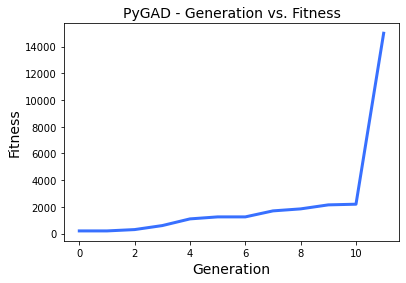

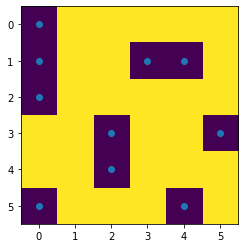

In [18]:
board = small_board2


########################

gene_space = [2,1] #2 - shot, 1 - no shot
ships = Counter(chain(*board))[0] #number of ships

        
sol_per_pop = 100
num_genes =  len(board)**2 #chromosome is a representation of board so there need to be the same number of genes as cells
num_parents_mating = int(sol_per_pop * 0.3)
num_generations = 50
keep_parents = 2
parent_selection_type = "sss"
crossover_type = "scattered"
mutation_type = "random"
mutation_percent_genes = 3 #only one gene to mutate
stop = ['reach_15000']

fitness_function = fitness_func2         
            

ga_instance = pygad.GA(gene_space=gene_space, num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, num_genes=num_genes, 
                       parent_selection_type=parent_selection_type, keep_parents=keep_parents, 
                       crossover_type=crossover_type, mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,stop_criteria = stop)


ga_instance.run()


solution, solution_fitness, solution_idx = ga_instance.best_solution()

#formating to show solved board 
solution = list(map(int,solution))
solution = np.array(list(chunks(solution,len(board))))

print("Parameters of the best solution :\n {solution}".format(solution=solution))
print("Fitness of best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Number of generations = ", ga_instance.generations_completed)

ga_instance.plot_fitness()

#plotting solved board
shoots = []
for i,lst in enumerate(solution):
    for j,shoot in enumerate(lst):
        if shoot == 2:
            shoots.append((i,j))
            
coords = [list(t) for t in zip(*shoots)]
plt.imshow(board)
plt.scatter(coords[1],coords[0])

#### Medium board 10x10

Parameters of the best solution :
 [[1 1 1 1 1 1 1 2 2 2]
 [1 2 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 2 2 2 2 1 2 1]
 [1 2 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 2 2 1 1 2 1 1 1]
 [1 1 1 1 1 1 2 1 1 1]
 [1 2 2 1 1 1 2 1 1 2]
 [1 1 1 1 2 1 1 1 1 2]]
Fitness of best solution = 15000
Number of generations =  22


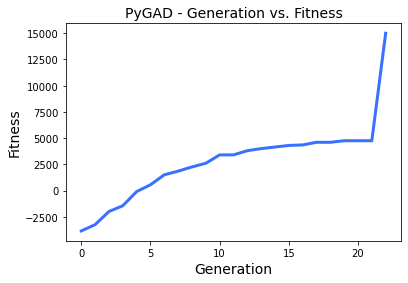

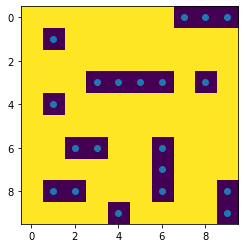

In [19]:
board = medium_board2


########################

gene_space = [2,1]
ships = Counter(chain(*board))[0] 

        
sol_per_pop = 120
num_genes =  len(board)**2 
num_parents_mating = int(sol_per_pop * 0.3)
num_generations = 100
keep_parents = 2
parent_selection_type = "sss"
crossover_type = "scattered"
mutation_type = "random"
mutation_percent_genes = 1
stop = ['reach_15000']

fitness_function = fitness_func2         
            

ga_instance = pygad.GA(gene_space=gene_space, num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, num_genes=num_genes, 
                       parent_selection_type=parent_selection_type, keep_parents=keep_parents, 
                       crossover_type=crossover_type, mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,stop_criteria = stop)


ga_instance.run()


solution, solution_fitness, solution_idx = ga_instance.best_solution()

#formating to show solved board 
solution = list(map(int,solution))
solution = np.array(list(chunks(solution,len(board))))

print("Parameters of the best solution :\n {solution}".format(solution=solution))
print("Fitness of best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Number of generations = ", ga_instance.generations_completed)

ga_instance.plot_fitness()

#plotting solved board
shoots = []
for i,lst in enumerate(solution):
    for j,shoot in enumerate(lst):
        if shoot == 2:
            shoots.append((i,j))
            
coords = [list(t) for t in zip(*shoots)]
plt.imshow(board)
plt.scatter(coords[1],coords[0])

#### Big board 15x15

Parameters of the best solution :
 [[1 1 1 1 1 2 1 1 1 1 1 1 1 2 1]
 [1 1 1 1 1 1 1 2 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 2 1 1 1 2 1 1 1]
 [1 1 2 2 2 1 1 1 1 1 1 2 1 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 2 2 2 2 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 2 1 1 1 1 1 1 2 1]
 [2 1 1 2 1 1 1 1 1 1 1 1 1 2 1]
 [1 1 1 2 1 1 2 2 2 1 1 1 1 1 1]
 [1 1 1 2 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 2 1 1 1 1 1 1 1 1 2 1 1]
 [1 1 1 1 1 1 2 2 2 2 2 1 1 1 1]
 [2 2 1 1 1 1 1 1 1 1 1 1 1 1 1]]
Fitness of best solution = 15000
Number of generations =  22


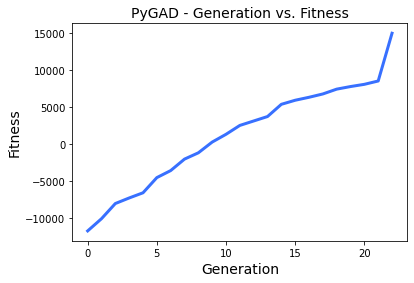

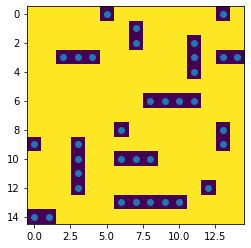

In [21]:
board = big_board2


########################

gene_space = [2,1]
ships = Counter(chain(*board))[0]

        
sol_per_pop = 450
num_genes =  len(board)**2 
num_parents_mating = int(sol_per_pop * 0.3)
num_generations = 200
keep_parents = 2
parent_selection_type = "sss"
crossover_type = "scattered"
mutation_type = "swap"
mutation_percent_genes = 1 
stop = ['reach_15000']

fitness_function = fitness_func2         
            

ga_instance = pygad.GA(gene_space=gene_space, num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, num_genes=num_genes, 
                       parent_selection_type=parent_selection_type, keep_parents=keep_parents, 
                       crossover_type=crossover_type, mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,stop_criteria = stop)


ga_instance.run()


solution, solution_fitness, solution_idx = ga_instance.best_solution()

#formating to show solved board 
solution = list(map(int,solution))
solution = np.array(list(chunks(solution,len(board))))

print("Parameters of the best solution :\n {solution}".format(solution=solution))
print("Fitness of best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Number of generations = ", ga_instance.generations_completed)

ga_instance.plot_fitness()

#plotting solved board
shoots = []
for i,lst in enumerate(solution):
    for j,shoot in enumerate(lst):
        if shoot == 2:
            shoots.append((i,j))
            
coords = [list(t) for t in zip(*shoots)]
plt.imshow(board)
plt.scatter(coords[1],coords[0])

## Testing

#### Small board 6x6

In [23]:
Sscore2 = 0
Stime_score2 = []

for i in range(100):
    start_time = time.time()
    
    random_board = rd.randint(0,2)
    board = small[random_board]

    ########################
    gene_space = [2,1]
    ships = Counter(chain(*board))[0]

    sol_per_pop = 100
    num_genes =  len(board)**2 #chromosome is a representation of board so there need to be the same number of genes as cells
    num_parents_mating = int(sol_per_pop * 0.3)
    num_generations = 50
    keep_parents = 2
    parent_selection_type = "sss"
    crossover_type = "scattered"
    mutation_type = "random"
    mutation_percent_genes = 3 #only one gene to mutate
    stop = ['reach_15000']
    fitness_function = fitness_func2
    
    
    ga_instance = pygad.GA(gene_space=gene_space, num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, num_genes=num_genes, 
                       parent_selection_type=parent_selection_type, keep_parents=keep_parents, 
                       crossover_type=crossover_type, mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,stop_criteria = stop)

    
    ga_instance.run()
    end_time = time.time()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    if solution_fitness == 15000:
        Sscore2 +=1
        Stime_score2.append(end_time-start_time)


print("Efficiency: {:.2f}%".format(Sscore2))
print("Time: {:.3f} sekund".format(np.mean(Stime_score2)))

Efficiency: 100.00%
Time: 0.133 sekund


#### Medium board 10x10

In [24]:
Mscore2 = 0
Mtime_score2 = []

for i in range(100):
    start_time = time.time()
    
    random_board = rd.randint(0,2)
    board = medium[random_board]

    ########################
    gene_space = [2,1]
    ships = Counter(chain(*board))[0]

    sol_per_pop = 120
    num_genes =  len(board)**2
    num_parents_mating = int(sol_per_pop * 0.3)
    num_generations = 100
    keep_parents = 2
    parent_selection_type = "sss"
    crossover_type = "scattered"
    mutation_type = "random"
    mutation_percent_genes = 1
    stop = ['reach_15000']
    fitness_function = fitness_func2
    
    ga_instance = pygad.GA(gene_space=gene_space, num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, num_genes=num_genes, 
                       parent_selection_type=parent_selection_type, keep_parents=keep_parents, 
                       crossover_type=crossover_type, mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,stop_criteria = stop)

    
    ga_instance.run()
    end_time = time.time()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    if solution_fitness == 15000:
        Mscore2 +=1
        Mtime_score2.append(end_time-start_time)


print("Efficiency: {:.2f}%".format(Mscore2))
print("Average time: {:.3f} sekund".format(np.mean(Mtime_score2)))

Efficiency: 100.00%
Average time: 0.536 sekund


#### Big board 15x15

In [25]:
Bscore2 = 0
Btime_score2 = []

for i in range(100):
    start_time = time.time()
    
    random_board = rd.randint(0,2)
    board = big[random_board]

    ########################
    gene_space = [2,1]
    ships = Counter(chain(*board))[0]
    
    sol_per_pop = 450
    num_genes =  len(board)**2 #ilość pól na planszy
    num_parents_mating = int(sol_per_pop * 0.3)
    num_generations = 200
    keep_parents = 2
    parent_selection_type = "sss"
    crossover_type = "scattered"
    mutation_type = "swap"
    mutation_percent_genes = 1
    stop = ['reach_15000']
    
    fitness_function = fitness_func2 
    
    ga_instance = pygad.GA(gene_space=gene_space, num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, num_genes=num_genes, 
                       parent_selection_type=parent_selection_type, keep_parents=keep_parents, 
                       crossover_type=crossover_type, mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,stop_criteria = stop)

    
    ga_instance.run()
    end_time = time.time()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    if solution_fitness == 15000:
        Bscore2 +=1
        Btime_score2.append(end_time-start_time)


print("Efficiency: {:.2f}%".format(Bscore2))
print("Average time: {:.3f} sekund".format(np.mean(Btime_score2)))

Efficiency: 75.00%
Average time: 3.640 sekund


|Size   | Efficiency  | Time     |
|------:|:------------|:---------|
| 6x6   | 100.00%     | 0.133s   |
| 10x10 | 100.00%     | 0.536s   |
| 15x15 | 75.00%      | 3.640s   |

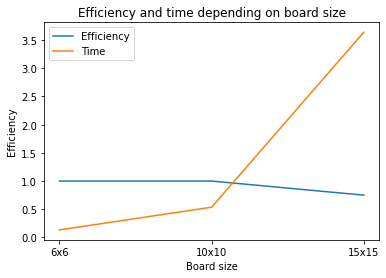

In [29]:
score2 = [1, 1, 0.75]
time2 = [0.133, 0.536, 3.640]

plt.plot(size, score2, label='Efficiency')
plt.plot(size, time2, label='Time')
plt.xlabel('Board size')
plt.ylabel('Efficiency')
plt.title('Efficiency and time depending on board size')
plt.legend()
plt.show()

This genetic algorithm performance is satisfactory. Similarly to previous one, time increases rapidly for the biggest input but still efficiency of 75% is good enough outcome for 15x15 board.

# Comparing algorythms and summary

|Size| Efficiency | Time |
|------:|:---------|:---------|
| Fit1 6x6   | 100.00%  | 0.110s   |
| Fit2 6x6   | 100.00%  | 0.133s   |
| Fit1 10x10 | 98.00%   | 0.773s   |
| Fit2 10x10 | 100.00%  | 0.536s   |
| Fit1 15x15 | 94.00%   | 4.106s   |
| Fit2 15x15 | 75.00%   | 3.640s   |

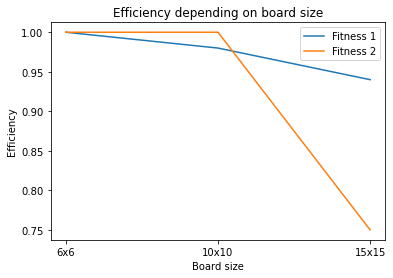

In [30]:
plt.plot(size, score1, label='Fitness 1')
plt.plot(size, score2, label='Fitness 2')
plt.xlabel('Board size')
plt.ylabel('Efficiency')
plt.title('Efficiency depending on board size')
plt.legend()
plt.show()

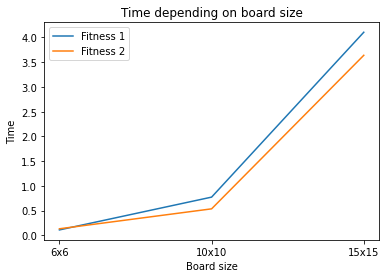

In [31]:
plt.plot(size, time1, label='Fitness 1')
plt.plot(size, time2, label='Fitness 2')
plt.xlabel('Board size')
plt.ylabel('Time')
plt.title('Time depending on board size')
plt.legend()
plt.show()

We can see that first algorithm performs better with bigger inputs compared to the second one. It's probably caused by larger number of genes in chromosome, however it might change if we increase some parameters like population or number of generations. Average solving time for 2nd algorithm is slightly less than for the 1st one for 10x10 and 15x15 inputs. Summing up the two algorithms perform quite similarly, but for inputs bigger than 15x15 the 1st one should be used for better efficiency.